# AlexNet
#### tensorflow==2.10.0

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

### Loading the images, rescaling and performing validation split.

In [4]:
train_dir = r"C:\Users\91909\Desktop\ML\DATA\PlantVillage-Dataset-master\PlantVillage-Dataset-master\raw\PLANT_VILLAGE_SPLIT\train"
test_dir = r"C:\Users\91909\Desktop\ML\DATA\PlantVillage-Dataset-master\PlantVillage-Dataset-master\raw\PLANT_VILLAGE_SPLIT\test"
val_dir = r"C:\Users\91909\Desktop\ML\DATA\PlantVillage-Dataset-master\PlantVillage-Dataset-master\raw\PLANT_VILLAGE_SPLIT\val"

In [5]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16

In [6]:
def preprocess_function(image):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image

In [7]:
datagen = ImageDataGenerator(rescale=1.0/255,
                             preprocessing_function=preprocess_function)

### Loading data for training, validation, and testing,

In [8]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 32572 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.
Found 10885 images belonging to 38 classes.


### Building the AlexNet model.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def AlexNet(input_shape=(224, 224, 3), num_classes=38):
    model = models.Sequential([
        layers.Conv2D(64, (7, 7), strides=2, padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((3, 3), strides=2),
        
        layers.Conv2D(128, (5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),
        
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),
        
        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

model = AlexNet(num_classes=38)

### 8. Using Adam optimizer with custom learning rate.

In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.build(input_shape=(None, 224, 224, 3))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 64)      9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 256)       5

### 9. Defining early stopping to stop overfitting during trining of the model.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=5, restore_best_weights=True)

In [17]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
2036/2036 [==============================] - 399s 192ms/step - loss: 1.7723 - accuracy: 0.4861 - val_loss: 0.9083 - val_accuracy: 0.7159
Epoch 2/50
2036/2036 [==============================] - 572s 281ms/step - loss: 0.9314 - accuracy: 0.7125 - val_loss: 0.6393 - val_accuracy: 0.8015
Epoch 3/50
2036/2036 [==============================] - 312s 153ms/step - loss: 0.7096 - accuracy: 0.7765 - val_loss: 0.5401 - val_accuracy: 0.8290
Epoch 4/50
2036/2036 [==============================] - 307s 151ms/step - loss: 0.5835 - accuracy: 0.8187 - val_loss: 0.5348 - val_accuracy: 0.8364
Epoch 5/50
2036/2036 [==============================] - 305s 150ms/step - loss: 0.5092 - accuracy: 0.8415 - val_loss: 0.5605 - val_accuracy: 0.8314
Epoch 6/50
2036/2036 [==============================] - 308s 151ms/step - loss: 0.4537 - accuracy: 0.8604 - val_loss: 0.4803 - val_accuracy: 0.8574
Epoch 7/50
2036/2036 [==============================] - 304s 150ms/step - loss: 0.4162 - accuracy: 0.8728 - val_

### Plotting the loss and accuracy to check for overfitting.

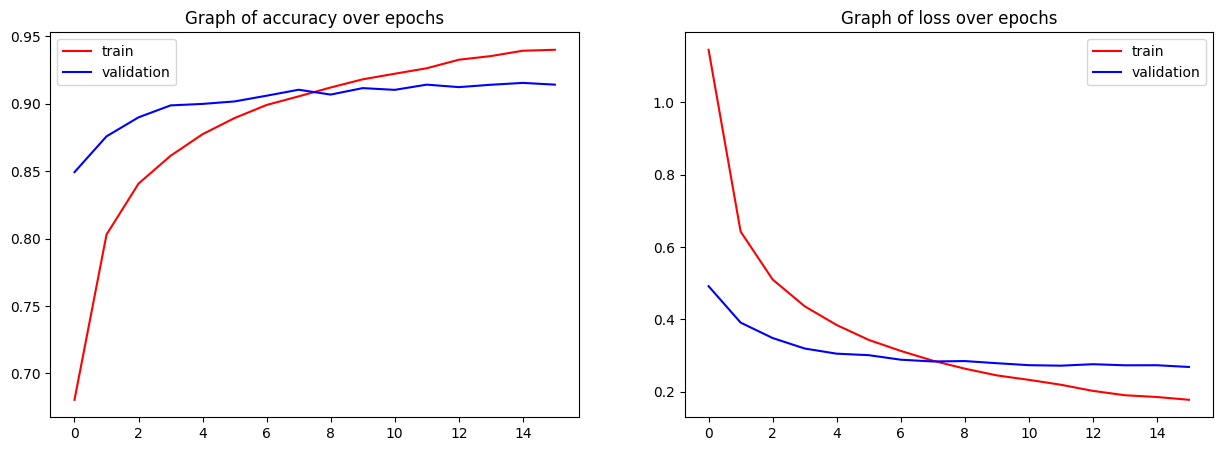

In [101]:
def printplot(history):
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history["accuracy"], color="red", label="train")
        plt.plot(history.history["val_accuracy"], color="blue", label="validation")
        plt.title("Graph of accuracy over epochs")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history["loss"], color="red", label="train")
        plt.plot(history.history["val_loss"], color="blue", label="validation")
        plt.title("Graph of loss over epochs")
        plt.legend()

printplot(history)

### Minimal overfitting observed as the both the graphs of training and validation converge together.

### Saving the model for future uses.

In [18]:
model.save('AlexNET.h5')

### Testing the model on a random image from the dataset.

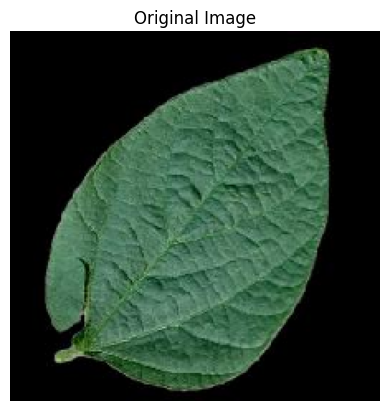

1/1 [==============================] - 0s 204ms/step
Predicted Class: Soybean___healthy
Actual Class: Soybean___healthy


In [19]:
images, labels = next(val_generator)

selected_image = images[0]
selected_label = labels[0]

plt.imshow(selected_image)
plt.title("Original Image")
plt.axis('off')
plt.show()

image_for_prediction = np.expand_dims(selected_image, axis=0)

predicted_probs = model.predict(image_for_prediction)
predicted_class = np.argmax(predicted_probs, axis=1)

actual_class = np.argmax(selected_label)

class_names = list(val_generator.class_indices.keys())

predicted_class_name = class_names[predicted_class[0]]
actual_class_name = class_names[actual_class]

print(f"Predicted Class: {predicted_class_name}")
print(f"Actual Class: {actual_class_name}")

### Testing the model on a test set.

In [2]:
model = tf.keras.models.load_model(r"C:\Users\91909\Downloads\AlexNET.h5")

In [9]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

681/681 [==============================] - 78s 103ms/step - loss: 0.4627 - accuracy: 0.8695
Test Accuracy: 86.95%
Test Loss: 0.4627
